<a href="https://colab.research.google.com/github/kondalraop/customer_coupon_acceptance/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

*   List item

*   List item
*   List item


*   List item



**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor

---

passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('/content/sample_data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

---



In [5]:
#Check the missing values(NAN)
print(data.isna().any())

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min         True
toCoupon_GEQ15min        True
toCoupon_GEQ25min        True
direction_same           True
direction_opp            True
Y                        True
dtype: bool


from this data it shows there is some problematic data in the dataset.
    

In [6]:
#count missing values in each column
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


From the above output Car,Bar,Cofeehouse,CarryAway,RestaurantLessThank20 and Restaurant20To50 columns have null values.

In [7]:
#Check Inconsistent data types
data.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


In [ ]:
#check duplaicate rows
print(data.duplicated().sum())

74


There are 74 duplciate records in the dataset

3. Decide what to do about your missing data -- drop, replace, other...

Fill and replace null values

In [8]:
#Check unique values in column car
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5'], dtype=object)

In [9]:
#Fill car column missing data with no
df = data
df['car'].fillna('no',inplace=True)
df['car'].unique()


/tmp/ipython-input-9-1017163537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['car'].fillna('no',inplace=True)


array(['no', 'Scooter and motorcycle', 'crossover', 'Mazda5'],
      dtype=object)

In [10]:
#Fill remaiing data with yes
df = df.replace({'car' : {'Scooter and motorcycle' : 'yes', 'crossover' : 'yes', 'Mazda5' : 'yes',
                          'do not drive' : 'no', 'Car that is too old to install Onstar :D' : 'no'}})
df['car'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df['Bar'].fillna(0)
df = df.replace({'Bar' : {'never' : 0}})
df['Bar'].unique()

array([0, 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

Drop null values

In [12]:
#Drop remaining null values
df.dropna(inplace=True)
df.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [13]:
#Total offered coupons
total_coupons_offered = df['Y'].count()
#Total coupons accepted
total_coupons_accepted = df['Y'].value_counts()[1]

#Proportion of coupons accepted
proportion_of_coupons_accepted = round((total_coupons_accepted / total_coupons_offered)*100,2)
print(f"Proportion of coupons accepted: {proportion_of_coupons_accepted}")

Proportion of coupons accepted: 57.93


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-14-3592570824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=df['coupon'].value_counts().index,y=df['coupon'].value_counts(),palette ='dark')


Text(0, 0.5, 'Total Count')

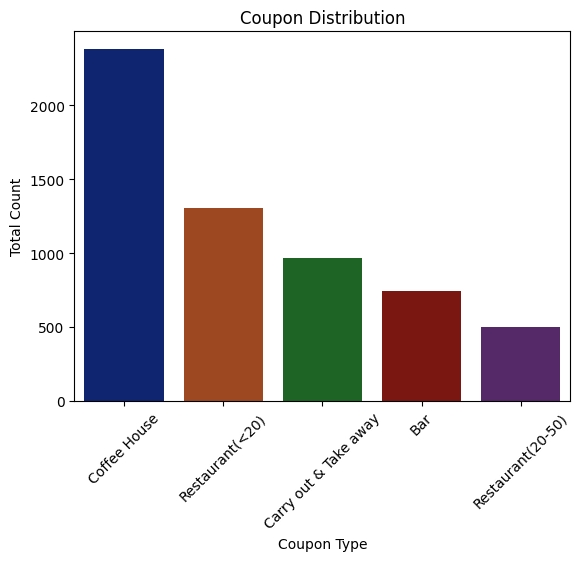

In [14]:
bar_plot = sns.barplot(x=df['coupon'].value_counts().index,y=df['coupon'].value_counts(),palette ='dark')
bar_plot.tick_params(axis='x', rotation=45)
bar_plot.set_title('Coupon Distribution')
bar_plot.set_xlabel('Coupon Type')
bar_plot.set_ylabel('Total Count')


6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

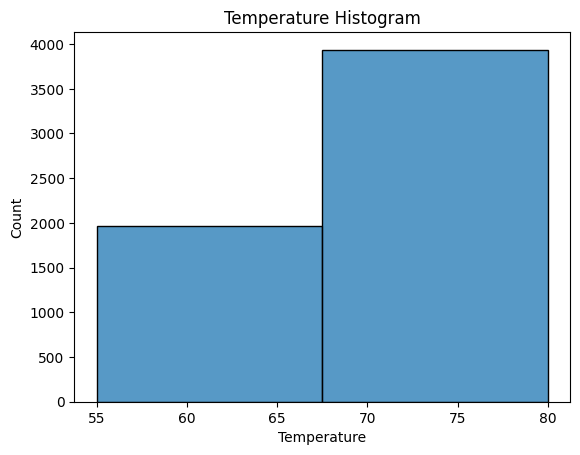

In [15]:
temp_hist = sns.histplot(data=df,x='temperature',binwidth=10)
temp_hist.set_title('Temperature Histogram')
temp_hist.set_xlabel('Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
#filter Bar coupons dataset
df_bar_coupon = df[df['coupon'] == 'Bar']
df_bar_coupon.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,0.0,1.0,1.0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,1.0,0.0,1.0
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,1.0,1.0,0.0,1.0,1.0
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1.0,0.0,0.0,0.0,1.0,0.0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1.0,0.0,0.0,1.0,0.0,0.0


2. What proportion of bar coupons were accepted?


In [17]:
#Bar coupons offered
total_bar_coupons_offered = df_bar_coupon['Y'].count()
#Bar coupons accepted
total_bar_coupons_accepted = df_bar_coupon['Y'].value_counts()[1]

#Proportion of bar coupons accepted
proportion_of_bar_coupons_accepted = (total_bar_coupons_accepted / total_bar_coupons_offered)*100
print(f"Proportion of bar coupons accepted: {proportion_of_bar_coupons_accepted}")

Proportion of bar coupons accepted: 45.71045576407507


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
# create list for frequent entries

more_frequent = ['gt8', '4~8']

#Use the list and create a new column for More Frequent Bar visit

df_bar_coupon['Bar_More_Frequent'] = np.where(df_bar_coupon['Bar'].isin(['gt8', '4~8']), 1, 0)

# Now, validate where the new column is present and the value counts are as expected

df_bar_coupon['Bar_More_Frequent'].value_counts()


/tmp/ipython-input-18-635216650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupon['Bar_More_Frequent'] = np.where(df_bar_coupon['Bar'].isin(['gt8', '4~8']), 1, 0)


,count
Bar_More_Frequent,
0,653
1,93


In [ ]:
total_bar_coupon_offered_frequent_visitors = df_bar_coupon.query("Bar_More_Frequent == 1")['Y'].count()
total_bar_coupons_accepted_frequent_visitors = df_bar_coupon.query("Bar_More_Frequent == 1")['Y'].value_counts()[1]
proportion_of_bar_coupons_accepted_frequent_visitors = round((total_bar_coupons_accepted_frequent_visitors / total_bar_coupon_offered_frequent_visitors)*100,2)
print(f"Proportion of bar coupons accepted by frequent visitors: {proportion_of_bar_coupons_accepted_frequent_visitors}")

Proportion of bar coupons accepted by frequent visitors: 76.17


Above analysis shows frequest visitors  to Bar have accepted the coupons 76% compared to less frequest visitors who showed less interest(37%).

   4.Compare the acceptance rate between drivers who go to a bar more  
     than once a month and are over the age of 25 to the all others. Is there a difference?


In [19]:
def conditions(coupon):
    if coupon['Bar'] in ['1~3', 'gt8', '4~8'] and coupon['age'] in ['46', '26', '31', '41', '50plus', '36']:
        return 1
    else:
        return 0

# create a new column based on the function above
df_bar_coupon['Bar_Frequent_Age'] = df_bar_coupon.apply(conditions, axis=1)
df_bar_coupon['Bar_Frequent_Age'].value_counts()

/tmp/ipython-input-19-2880251808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupon['Bar_Frequent_Age'] = df_bar_coupon.apply(conditions, axis=1)


,count
Bar_Frequent_Age,
0,584
1,162


In [20]:
#Elderly drivers coupon acceptance proportion
bar_coupon_accepted_elder_age = df_bar_coupon.query("Bar_Frequent_Age == 1")['Y'].value_counts()[1]
total_bar_coupon_offered_elder_age = df_bar_coupon.query("Bar_Frequent_Age == 1")['Y'].count()
proportion_of_bar_coupon_elderly_age = (bar_coupon_accepted_elder_age / total_bar_coupon_offered_elder_age)* 100
print(f"Proportion of bar coupons accepted by elderly drivers: {proportion_of_bar_coupon_elderly_age}")

#Young drivers coupon acceptance proportion
bar_coupon_accepted_younger_age = df_bar_coupon.query("Bar_Frequent_Age == 0")['Y'].value_counts()[1]
total_bar_coupon_offered_younger_age = df_bar_coupon.query("Bar_Frequent_Age == 0")['Y'].count()
proportion_of_bar_coupon_younger_age = (bar_coupon_accepted_younger_age / total_bar_coupon_offered_younger_age)* 100
print(f"Proportion of bar coupons accepted by young drivers: {proportion_of_bar_coupon_younger_age}")

Proportion of bar coupons accepted by elderly drivers: 77.77777777777779
Proportion of bar coupons accepted by young drivers: 36.81506849315068


From the above analysis more frequent elderly people accepted coupon proportion is 69% and less frequent yound people coupon acceptance rate is 34%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:
#Get the unique values of occupation
df_bar_coupon['occupation'].unique()


array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations'], dtype=object)

In [22]:
def conditions(age_occupation):
    if age_occupation['Bar'] in ['1~3', 'gt8', '4~8'] and age_occupation['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and age_occupation['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0

# Create a new column for age and occupation
df_bar_coupon['Bar_Frequent_Age_Occupation'] = df_bar_coupon.apply(conditions, axis=1)
df_bar_coupon['Bar_Frequent_Age_Occupation'].value_counts()

/tmp/ipython-input-22-111403373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupon['Bar_Frequent_Age_Occupation'] = df_bar_coupon.apply(conditions, axis=1)


,count
Bar_Frequent_Age_Occupation,
0,513
1,233


In [23]:
bar_coupon_accepted_age_occ = df_bar_coupon.query("Bar_Frequent_Age_Occupation == 1")['Y'].value_counts()[1]
total_bar_coupon_offered_age_occ = df_bar_coupon.query("Bar_Frequent_Age_Occupation == 1")['Y'].count()
proportion_of_bar_coupon_age_occ = (bar_coupon_accepted_age_occ / total_bar_coupon_offered_age_occ)* 100

print(f"Proportion of bar coupons accepted by drivers with age and occupation: {proportion_of_bar_coupon_age_occ}")

bar_coupon_accepted__young_age_occ = df_bar_coupon.query("Bar_Frequent_Age_Occupation == 0")['Y'].value_counts()[1]
total_bar_coupon_offered_young_age_occ = df_bar_coupon.query("Bar_Frequent_Age_Occupation == 0")['Y'].count()
proportion_of_bar_coupon_young_age_occ = (bar_coupon_accepted__young_age_occ / total_bar_coupon_offered_young_age_occ)* 100

print(f"Proportion of bar coupons accepted by drivers with young age and occupation: {proportion_of_bar_coupon_young_age_occ}")

Proportion of bar coupons accepted by drivers with age and occupation: 75.10729613733905
Proportion of bar coupons accepted by drivers with young age and occupation: 32.35867446393762


From the above analysis elderly people without farming/fishing/forestry job accepted coupon proportion rate is 69% and young visitors accptance rate is 30%

6. Compare the acceptance rates between those drivers who:

---



- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [24]:
df_bar_coupon['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [25]:
df_bar_coupon['maritalStatus'].unique()

def conditions(age_marital):
    if age_marital['Bar'] in ['1~3', 'gt8', '4~8'] and age_marital['passanger'] not in ['Kid(s)'] and age_marital['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0

#create a new column based on marital status not widowed
df_bar_coupon['Bar_Frequent_Age_MaritalStatus'] = df_bar_coupon.apply(conditions, axis=1)

bar_coupon_accepted_elder_age_not_widowed = df_bar_coupon.query("Bar_Frequent_Age_MaritalStatus == 1")['Y'].value_counts()[1]
total_bar_coupon_offered_elder_age_not_widowed = df_bar_coupon.query("Bar_Frequent_Age_MaritalStatus == 1")['Y'].count()
proportion_bar_coupon_not_widowed = (bar_coupon_accepted_elder_age_not_widowed / total_bar_coupon_offered_elder_age_not_widowed)* 100
print(f"Proportion of bar coupons accepted by drivers with age, passanger without kids and marital status and not widowed: {proportion_bar_coupon_not_widowed}")

#create a column coupon acceptance under age 30
def conditions(age_LT30_marital):
    if age_LT30_marital['Bar'] in ['1~3', 'gt8', '4~8'] and age_LT30_marital['age'] in ['below21','21','26']:
        return 1
    else:
        return 0

#create a new column for Frequent age under 30
df_bar_coupon['Bar_Frequent_Age_Under30'] = df_bar_coupon.apply(conditions, axis=1)

bar_coupon_accepted_elder_age_under30 = df_bar_coupon.query("Bar_Frequent_Age_Under30 == 1")['Y'].value_counts()[1]
total_bar_coupon_offered_elder_age_under30 = df_bar_coupon.query("Bar_Frequent_Age_Under30 == 1")['Y'].count()
proportion_bar_coupon_under30 = (bar_coupon_accepted_elder_age_under30 / total_bar_coupon_offered_elder_age_under30)* 100
print(f"Proportion of bar coupons accepted by drivers with age under 30: {proportion_bar_coupon_under30}")

#unique values for RestaurantLessThan20 and income
df_bar_coupon['RestaurantLessThan20'].unique()

df_bar_coupon['income'].unique()

def conditions(income):
    if income['RestaurantLessThan20'] in ['4~8', 'gt8'] and income['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0

df_bar_coupon['Bar_restaurant_low_income'] = df_bar_coupon.apply(conditions, axis=1)

bar_coupon_accepted_restaurant_low_income = df_bar_coupon.query("Bar_restaurant_low_income == 1")['Y'].value_counts()[1]
total_bar_coupon_offered_restaurant_low_income = df_bar_coupon.query("Bar_restaurant_low_income == 1")['Y'].count()
proportion_of_bar_coupon_young_age_occ = (bar_coupon_accepted_restaurant_low_income / total_bar_coupon_offered_restaurant_low_income)* 100
print(f"Proportion of bar coupons accepted by drivers with low income and restaurant visit: {proportion_of_bar_coupon_young_age_occ}")


Proportion of bar coupons accepted by drivers with age, passanger without kids and marital status and not widowed: 77.77777777777779
Proportion of bar coupons accepted by drivers with age under 30: 77.61194029850746
Proportion of bar coupons accepted by drivers with low income and restaurant visit: 55.319148936170215


/tmp/ipython-input-25-3644447872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupon['Bar_Frequent_Age_MaritalStatus'] = df_bar_coupon.apply(conditions, axis=1)
/tmp/ipython-input-25-3644447872.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupon['Bar_Frequent_Age_Under30'] = df_bar_coupon.apply(conditions, axis=1)
/tmp/ipython-input-25-3644447872.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

From the above analysis drivers go to bar more than once a month with out passanger kids and marital status without widowed is 71% and
drivers goto bar under age 30 71% and
drivers go to bar more than 4 times with low income less than 50K 45%.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers visit more than 3 times a month are significantly more likely accept bar coupons.

Under 30 years of age people have higher acceptance rate of bar coupons.For socilizing young people shows interest to accept coupons and receive bar coupons so that they can make more vistits to bar.

Drivers who are not widowed and have occupation outside of farming,fishing or forestry accept more bar coupons.This shows individuals in certain occupations or marital status have more social engagements.

Drivers with low income less than 50K have distinct bar coupon acceptance rate.
This shows economic status and individual habits influnce the acceptace of bar coupons and visit the bar frequncy.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [39]:
#Carry out & Take away
df['coupon'].unique()
df_carryout_Takeaway_coupons = df.query("coupon == 'Carry out & Take away'")
df_carryout_Takeaway_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1.0,1.0,0.0,0.0,1.0,0.0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1.0,1.0,0.0,0.0,1.0,1.0
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1.0,0.0,0.0,1.0,0.0,1.0
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1.0,1.0,0.0,0.0,1.0,1.0
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1.0,1.0,0.0,0.0,1.0,1.0


In [28]:
df_carryout_Takeaway_coupons.shape
#Carryout takeaway coupons accepted
carryout_Takeaway_coupons_accepted = df_carryout_Takeaway_coupons['Y'].value_counts()[1]
#Total Carryout takeaway coupons offered
total_carryout_Takeaway_coupons_offered = df_carryout_Takeaway_coupons['Y'].count()
#Proportion of carryout takeaway coupons accepted
proportion_of_carryout_Takeaway_coupons_accepted = (carryout_Takeaway_coupons_accepted / total_carryout_Takeaway_coupons_offered)*100
proportion_of_carryout_Takeaway_coupons_accepted

np.float64(74.4041450777202)

In [64]:
df_carryout_Takeaway_coupons.shape
df_carryout_Takeaway_coupons['acceptance'] = df_carryout_Takeaway_coupons['Y'].astype("int")
df_carryout_Takeaway_coupons['acceptance'] = df_carryout_Takeaway_coupons['acceptance'].astype("string")
df_carryout_Takeaway_coupons

/tmp/ipython-input-64-2393764208.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-64-2393764208.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,acceptance
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1.0,1.0,0.0,0.0,1.0,0.0,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,4~8,4~8,less1,1.0,1.0,0.0,0.0,1.0,1.0,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1.0,0.0,0.0,1.0,0.0,1.0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,1~3,1~3,never,1.0,1.0,0.0,0.0,1.0,1.0,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,1~3,1~3,never,1.0,1.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Male,46,Married partner,...,less1,4~8,1~3,1.0,1.0,1.0,0.0,1.0,0.0,0
6161,Home,Alone,Sunny,80,10PM,Carry out & Take away,1d,Male,46,Married partner,...,less1,4~8,1~3,1.0,0.0,0.0,1.0,0.0,0.0,0
6166,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,46,Married partner,...,less1,4~8,1~3,1.0,1.0,1.0,0.0,1.0,0.0,0
6167,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,46,Married partner,...,less1,4~8,1~3,1.0,1.0,1.0,0.0,1.0,1.0,1


/tmp/ipython-input-68-338461402.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-68-338461402.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Distribution of Accepted Coupons')

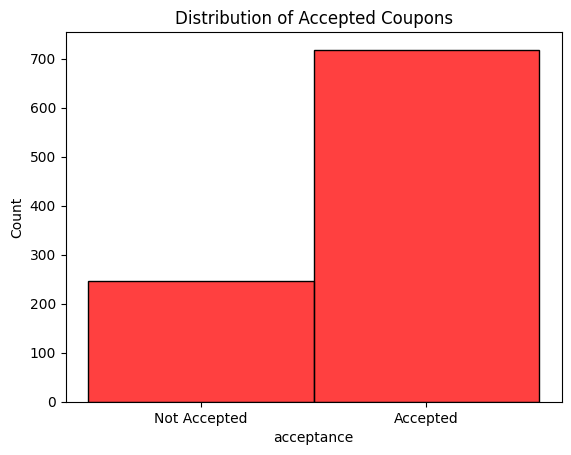

In [68]:
df_carryout_Takeaway_coupons['acceptance'] = df_carryout_Takeaway_coupons['acceptance'].str.replace('1', 'Accepted')
df_carryout_Takeaway_coupons['acceptance'] = df_carryout_Takeaway_coupons['acceptance'].str.replace('0', 'Not Accepted')
df_carryout_Takeaway_coupons.head()
takwaway_hist = sns.histplot(data=df_carryout_Takeaway_coupons, x='acceptance', color='red')
takwaway_hist.set_title('Distribution of Accepted Coupons')

In [69]:
fig = px.bar(df_carryout_Takeaway_coupons['passanger'],color=df_carryout_Takeaway_coupons['acceptance'],
             title='carryout andTakeaway coupon acceptance by passanger type',
             labels={'value':'Passanger type',
                    'count':'Total acceptance'}
             )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)


In [70]:
#Take away and carryout coupon acceptance by Age
fig = px.bar(df_carryout_Takeaway_coupons['age'], color=df_carryout_Takeaway_coupons['acceptance'],
             title = 'Carryout and Takeaway Coupon Acceptance by Age',
            labels={'value':'Age',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

In [71]:
fig = px.bar(df_carryout_Takeaway_coupons['occupation'], color=df_carryout_Takeaway_coupons['acceptance'],
             title = 'Carryout and Takeaway Coupon Acceptance by Occupation',
            labels={'value':'Occupation',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

In [ ]:
@Finding

@Findings - From the above analysis Carryout and Takeaway coupons acceptance rate is 74%.
More number of coupons are accepted by young people age between 21 and 30, students and un employed people and passanger type alone.